<a href="https://colab.research.google.com/github/yasminela/DB/blob/main/prediction_prix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('house_prices.csv')

In [ ]:
# Prepare the features and target variable
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

In [ ]:
print(data)

   SquareFootage  Bedrooms  Bathrooms   Price
0           1500         3          2  300000
1           1800         4          2  350000
2           2400         4          3  500000
3           3000         5          4  650000
4           1300         2          1  220000
5           2200         4          2  450000
6           2800         5          3  600000
7           1600         3          2  320000
8           1900         4          3  400000
9           2500         4          3  520000


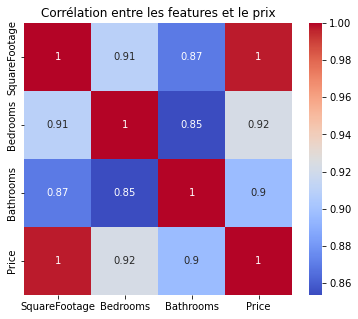

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les features et le prix")
plt.show()

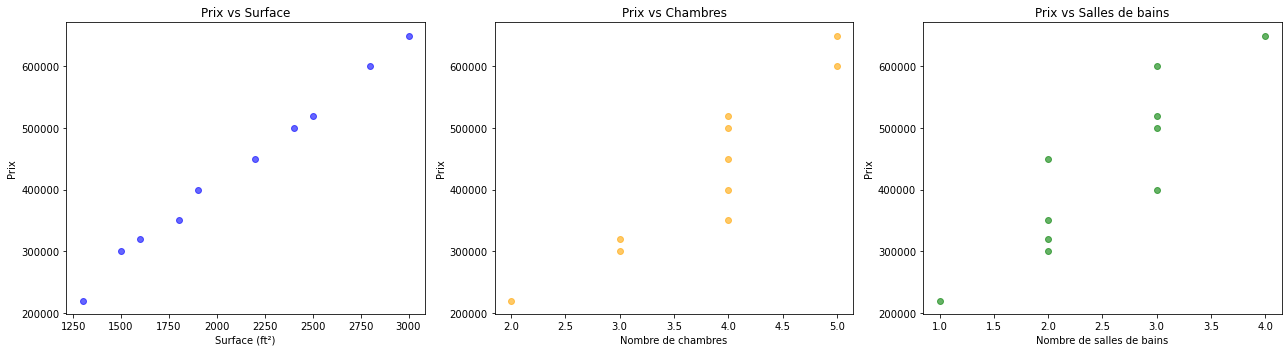

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 ligne, 3 colonnes

# 1. Surface vs Prix
axes[0].scatter(data['SquareFootage'], data['Price'], alpha=0.6, color="blue")
axes[0].set_xlabel("Surface (ft²)")
axes[0].set_ylabel("Prix")
axes[0].set_title("Prix vs Surface")

# 2. Chambres vs Prix
axes[1].scatter(data['Bedrooms'], data['Price'], alpha=0.6, color="orange")
axes[1].set_xlabel("Nombre de chambres")
axes[1].set_ylabel("Prix")
axes[1].set_title("Prix vs Chambres")

# 3. Salles de bains vs Prix
axes[2].scatter(data['Bathrooms'], data['Price'], alpha=0.6, color="green")
axes[2].set_xlabel("Nombre de salles de bains")
axes[2].set_ylabel("Prix")
axes[2].set_title("Prix vs Salles de bains")

plt.tight_layout()  # ajuste l'espacement
plt.show()

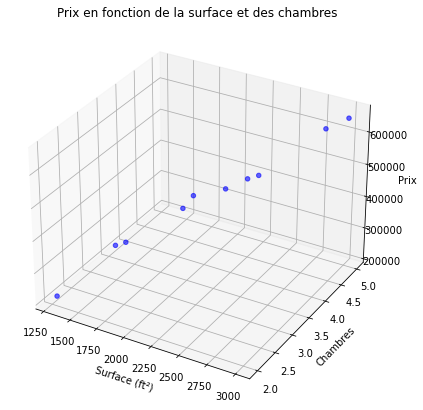

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['SquareFootage'], data['Bedrooms'], data['Price'], c='blue', alpha=0.6)

ax.set_xlabel("Surface (ft²)")
ax.set_ylabel("Chambres")
ax.set_zlabel("Prix")
ax.set_title("Prix en fonction de la surface et des chambres")
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

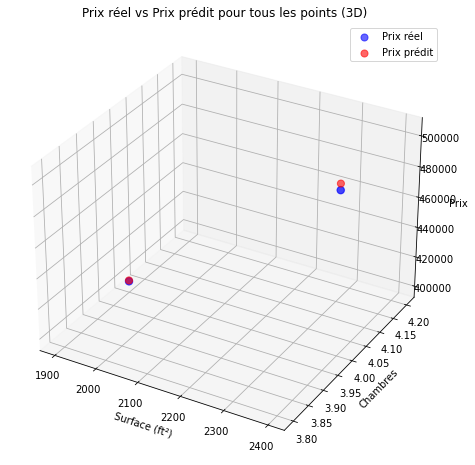

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Réels : couleur bleue
ax.scatter(X_test['SquareFootage'], X_test['Bedrooms'], y_test,
           c='blue', alpha=0.6, s=50, label='Prix réel')

# Prédits : couleur rouge
ax.scatter(X_test['SquareFootage'], X_test['Bedrooms'], y_pred,
           c='red', alpha=0.6, s=50, label='Prix prédit')

# Option : représenter Bathrooms par taille des points
sizes = X_test['Bathrooms'] * 20  # ajuster la taille pour visibilité
ax.scatter(X_test['SquareFootage'], X_test['Bedrooms'], y_test,
           s=sizes, c='blue', alpha=0.3)

# Labels et titre
ax.set_xlabel('Surface (ft²)')
ax.set_ylabel('Chambres')
ax.set_zlabel('Prix')
ax.set_title('Prix réel vs Prix prédit pour tous les points (3D)')
ax.legend()

plt.show()



In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination R² :", r2)

Mean Squared Error: 8597674.90966712
Coefficient de détermination R² : 0.9965609300361331


In [ ]:
# Predicting price for a new house
new_house = pd.DataFrame({'SquareFootage': [2000], 'Bedrooms': [3], 'Bathrooms': [2]})
predicted_price = model.predict(new_house)
print("Predicted price for the new house:", predicted_price[0])

Predicted price for the new house: 396027.9441117761


In [ ]:
# autre moèle de regression

In [ ]:
#Ridge Regression (régression linéaire avec régularisation)

#Lasso Regression (réduction des coefficients non importants)

#Decision Tree Regressor (modèle non linéaire, capture interactions complexes)

#Random Forest Regressor (ensemble d’arbres, plus stable et précis)

#Gradient Boosting Regressor (boosting, très performant sur des données tabulaires)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Liste des modèles
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Entraîner et évaluer chaque modèle
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Afficher les résultats
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values("R2", ascending=False))


                           MSE        R2
Lasso             8.596966e+06  0.996561
LinearRegression  8.597675e+06  0.996561
RandomForest      4.062500e+07  0.983750
Ridge             4.846799e+07  0.980613
GradientBoosting  1.449865e+09  0.420054
DecisionTree      1.450000e+09  0.420000
